<a href="https://colab.research.google.com/github/Yasho8803/21BDS0282_EDA_TheoryDA/blob/main/Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Dimensions of the dataset

In [4]:
import pandas as pd
import os
os.getcwd()

'/content'

In [5]:
data = pd.read_csv("horse.csv")

In [6]:
print("Dimensions:", data.shape)

# Check for duplicates
print("Number of duplicated rows:", data.duplicated().sum())

Dimensions: (299, 28)
Number of duplicated rows: 0


In [7]:
#Summary of the dataset

In [8]:
print(data.info())  # Structure and data types
print(data.describe(include='all'))  # Summary for all columns

# Check unique values in each column
unique_values = {col: data[col].unique() for col in data.columns}
print(unique_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [9]:
#DATA HANDLING

In [10]:
# Count missing values in each column
print(data.isnull().sum())

# Replace "NA" strings with actual NaN
data.replace("NA", pd.NA, inplace=True)

# Convert appropriate columns to categorical
data['outcome'] = data['outcome'].astype('category')
data['pain'] = data['pain'].astype('category')

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


In [11]:
#DATA CLEANING

In [12]:
# Remove rows with too many missing values (e.g., >50% missing)
threshold = 0.5 * data.shape[1]
data = data[data.isnull().sum(axis=1) <= threshold]

# Replace missing numerical values with mean
data['packed_cell_volume'] = data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean())

# Replace missing categorical values with mode
for col in data.select_dtypes(include=['category']):
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify cleaned dataset
print(data.isnull().sum())
print(data.head())

surgery                    0
age                        0
hospital_number            0
rectal_temp               52
pulse                     16
respiratory_rate          49
temp_of_extremities       42
peripheral_pulse          55
mucous_membrane           33
capillary_refill_time     19
pain                       0
peristalsis               30
abdominal_distention      42
nasogastric_tube          90
nasogastric_reflux        92
nasogastric_reflux_ph    232
rectal_exam_feces         88
abdomen                  104
packed_cell_volume         0
total_protein             23
abdomo_appearance        152
abdomo_protein           185
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64
  surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0      no  adult           530101         38.5   66.0              28.0   
1     yes  adult         

<ipython-input-12-20a8ce484833>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['packed_cell_volume'] = data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean())
<ipython-input-12-20a8ce484833>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].

In [13]:
#UNIVARIATE ANALYSIS

outcome
lived         171
died           70
euthanized     44
Name: count, dtype: int64


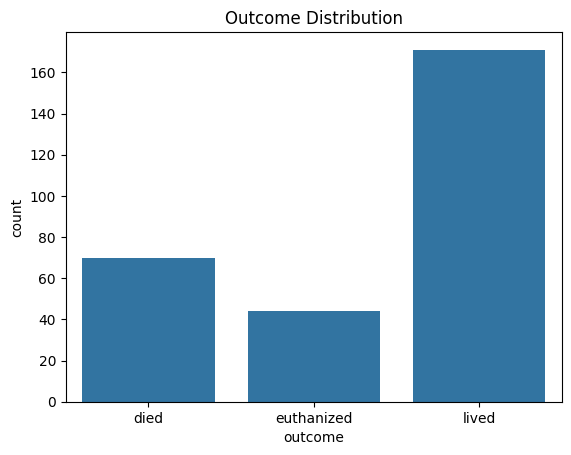

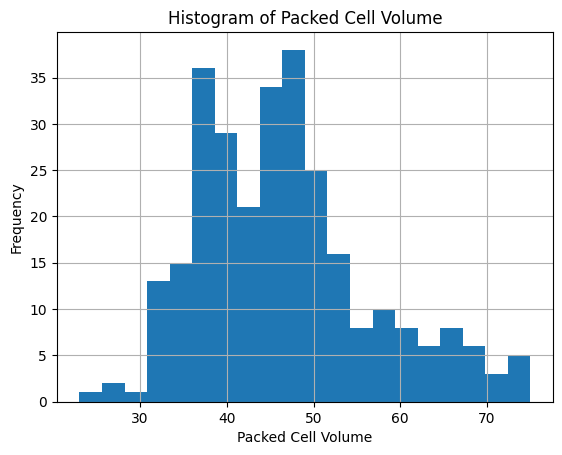

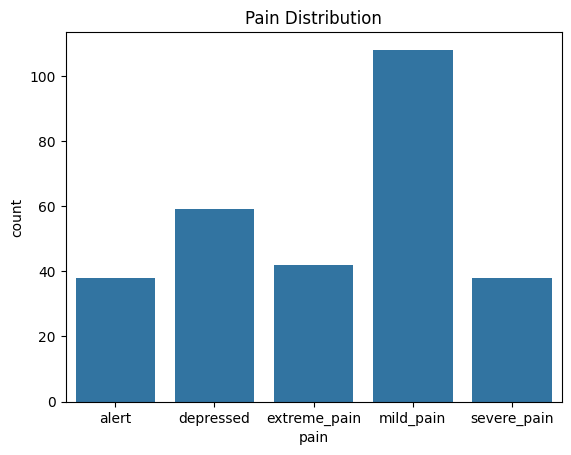

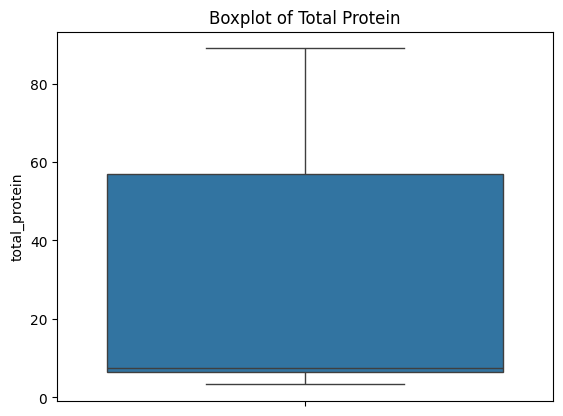

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Frequency of categorical columns (e.g., outcome)
print(data['outcome'].value_counts())
sns.countplot(x='outcome', data=data)
plt.title("Outcome Distribution")
plt.show()

# Histogram for numerical columns
data['packed_cell_volume'].hist(bins=20)
plt.title("Histogram of Packed Cell Volume")
plt.xlabel("Packed Cell Volume")
plt.ylabel("Frequency")
plt.show()

# Barplot for categorical variables
sns.countplot(x='pain', data=data)
plt.title("Pain Distribution")
plt.show()

# Boxplot for numerical variables
sns.boxplot(y='total_protein', data=data)
plt.title("Boxplot of Total Protein")
plt.show()

In [15]:
#BIVARIATE ANALYSIS

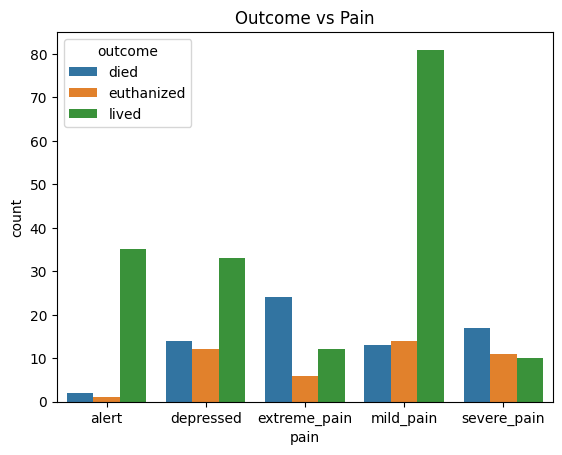

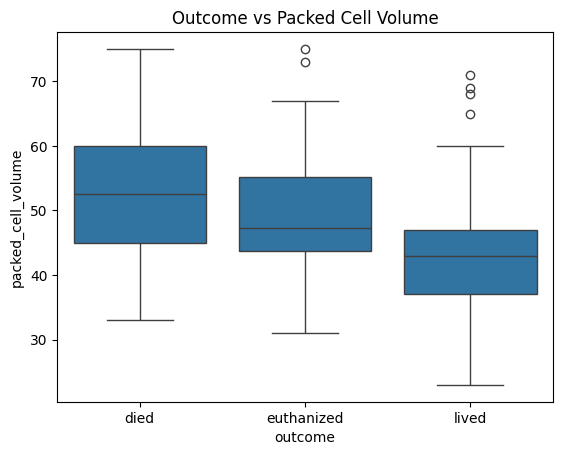

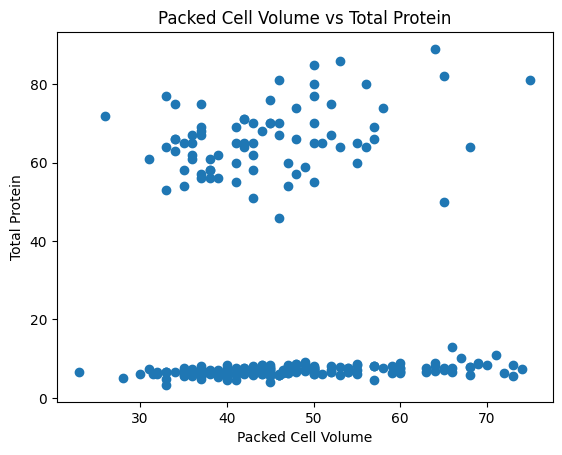

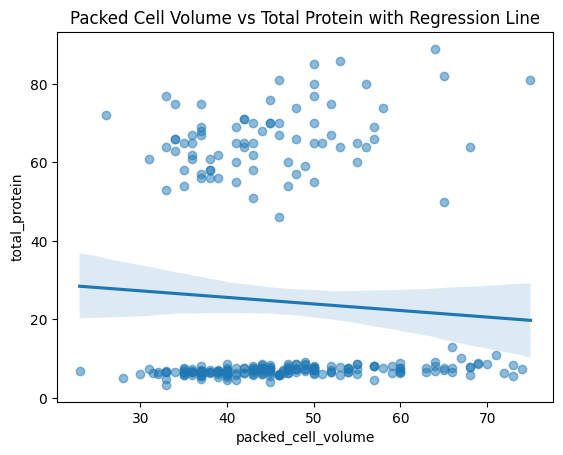

In [16]:
# Categorical vs. Categorical: Outcome vs. Pain
sns.countplot(x='pain', hue='outcome', data=data)
plt.title("Outcome vs Pain")
plt.show()

# Categorical vs. Numerical: Outcome vs. Packed Cell Volume
sns.boxplot(x='outcome', y='packed_cell_volume', data=data)
plt.title("Outcome vs Packed Cell Volume")
plt.show()

# Numerical vs. Numerical: Packed Cell Volume vs. Total Protein
plt.scatter(data['packed_cell_volume'], data['total_protein'])
plt.title("Packed Cell Volume vs Total Protein")
plt.xlabel("Packed Cell Volume")
plt.ylabel("Total Protein")
plt.show()

# Adding a regression line
sns.regplot(x='packed_cell_volume', y='total_protein', data=data, scatter_kws={'alpha':0.5})
plt.title("Packed Cell Volume vs Total Protein with Regression Line")
plt.show()

In [17]:
#MULTIVARIATE ANALYSIS

                       hospital_number  rectal_temp     pulse  \
hospital_number               1.000000     0.136091  0.373186   
rectal_temp                   0.136091     1.000000  0.199201   
pulse                         0.373186     0.199201  1.000000   
respiratory_rate              0.242064     0.253541  0.445952   
nasogastric_reflux_ph        -0.005577     0.228306  0.005796   
packed_cell_volume           -0.086178     0.064224  0.397056   
total_protein                -0.223502    -0.060817 -0.086533   
abdomo_protein               -0.036033     0.077515  0.046461   
lesion_1                      0.133993     0.059376  0.078292   
lesion_2                     -0.048658    -0.065761 -0.002552   
lesion_3                     -0.020203     0.028941  0.103101   

                       respiratory_rate  nasogastric_reflux_ph  \
hospital_number                0.242064              -0.005577   
rectal_temp                    0.253541               0.228306   
pulse                

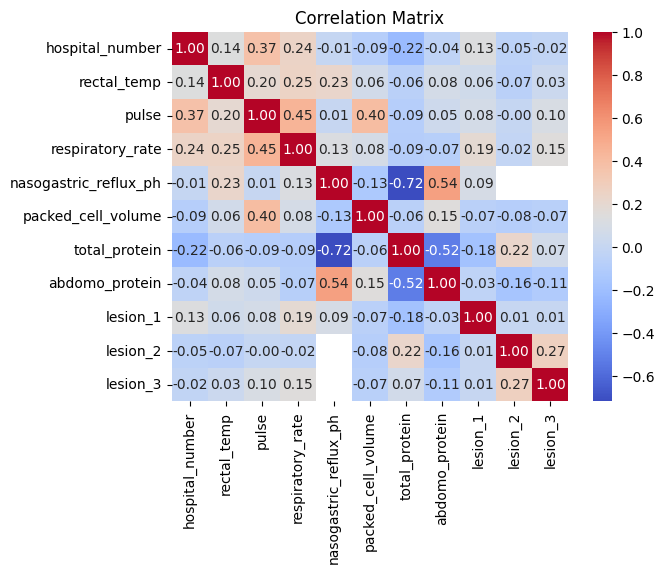

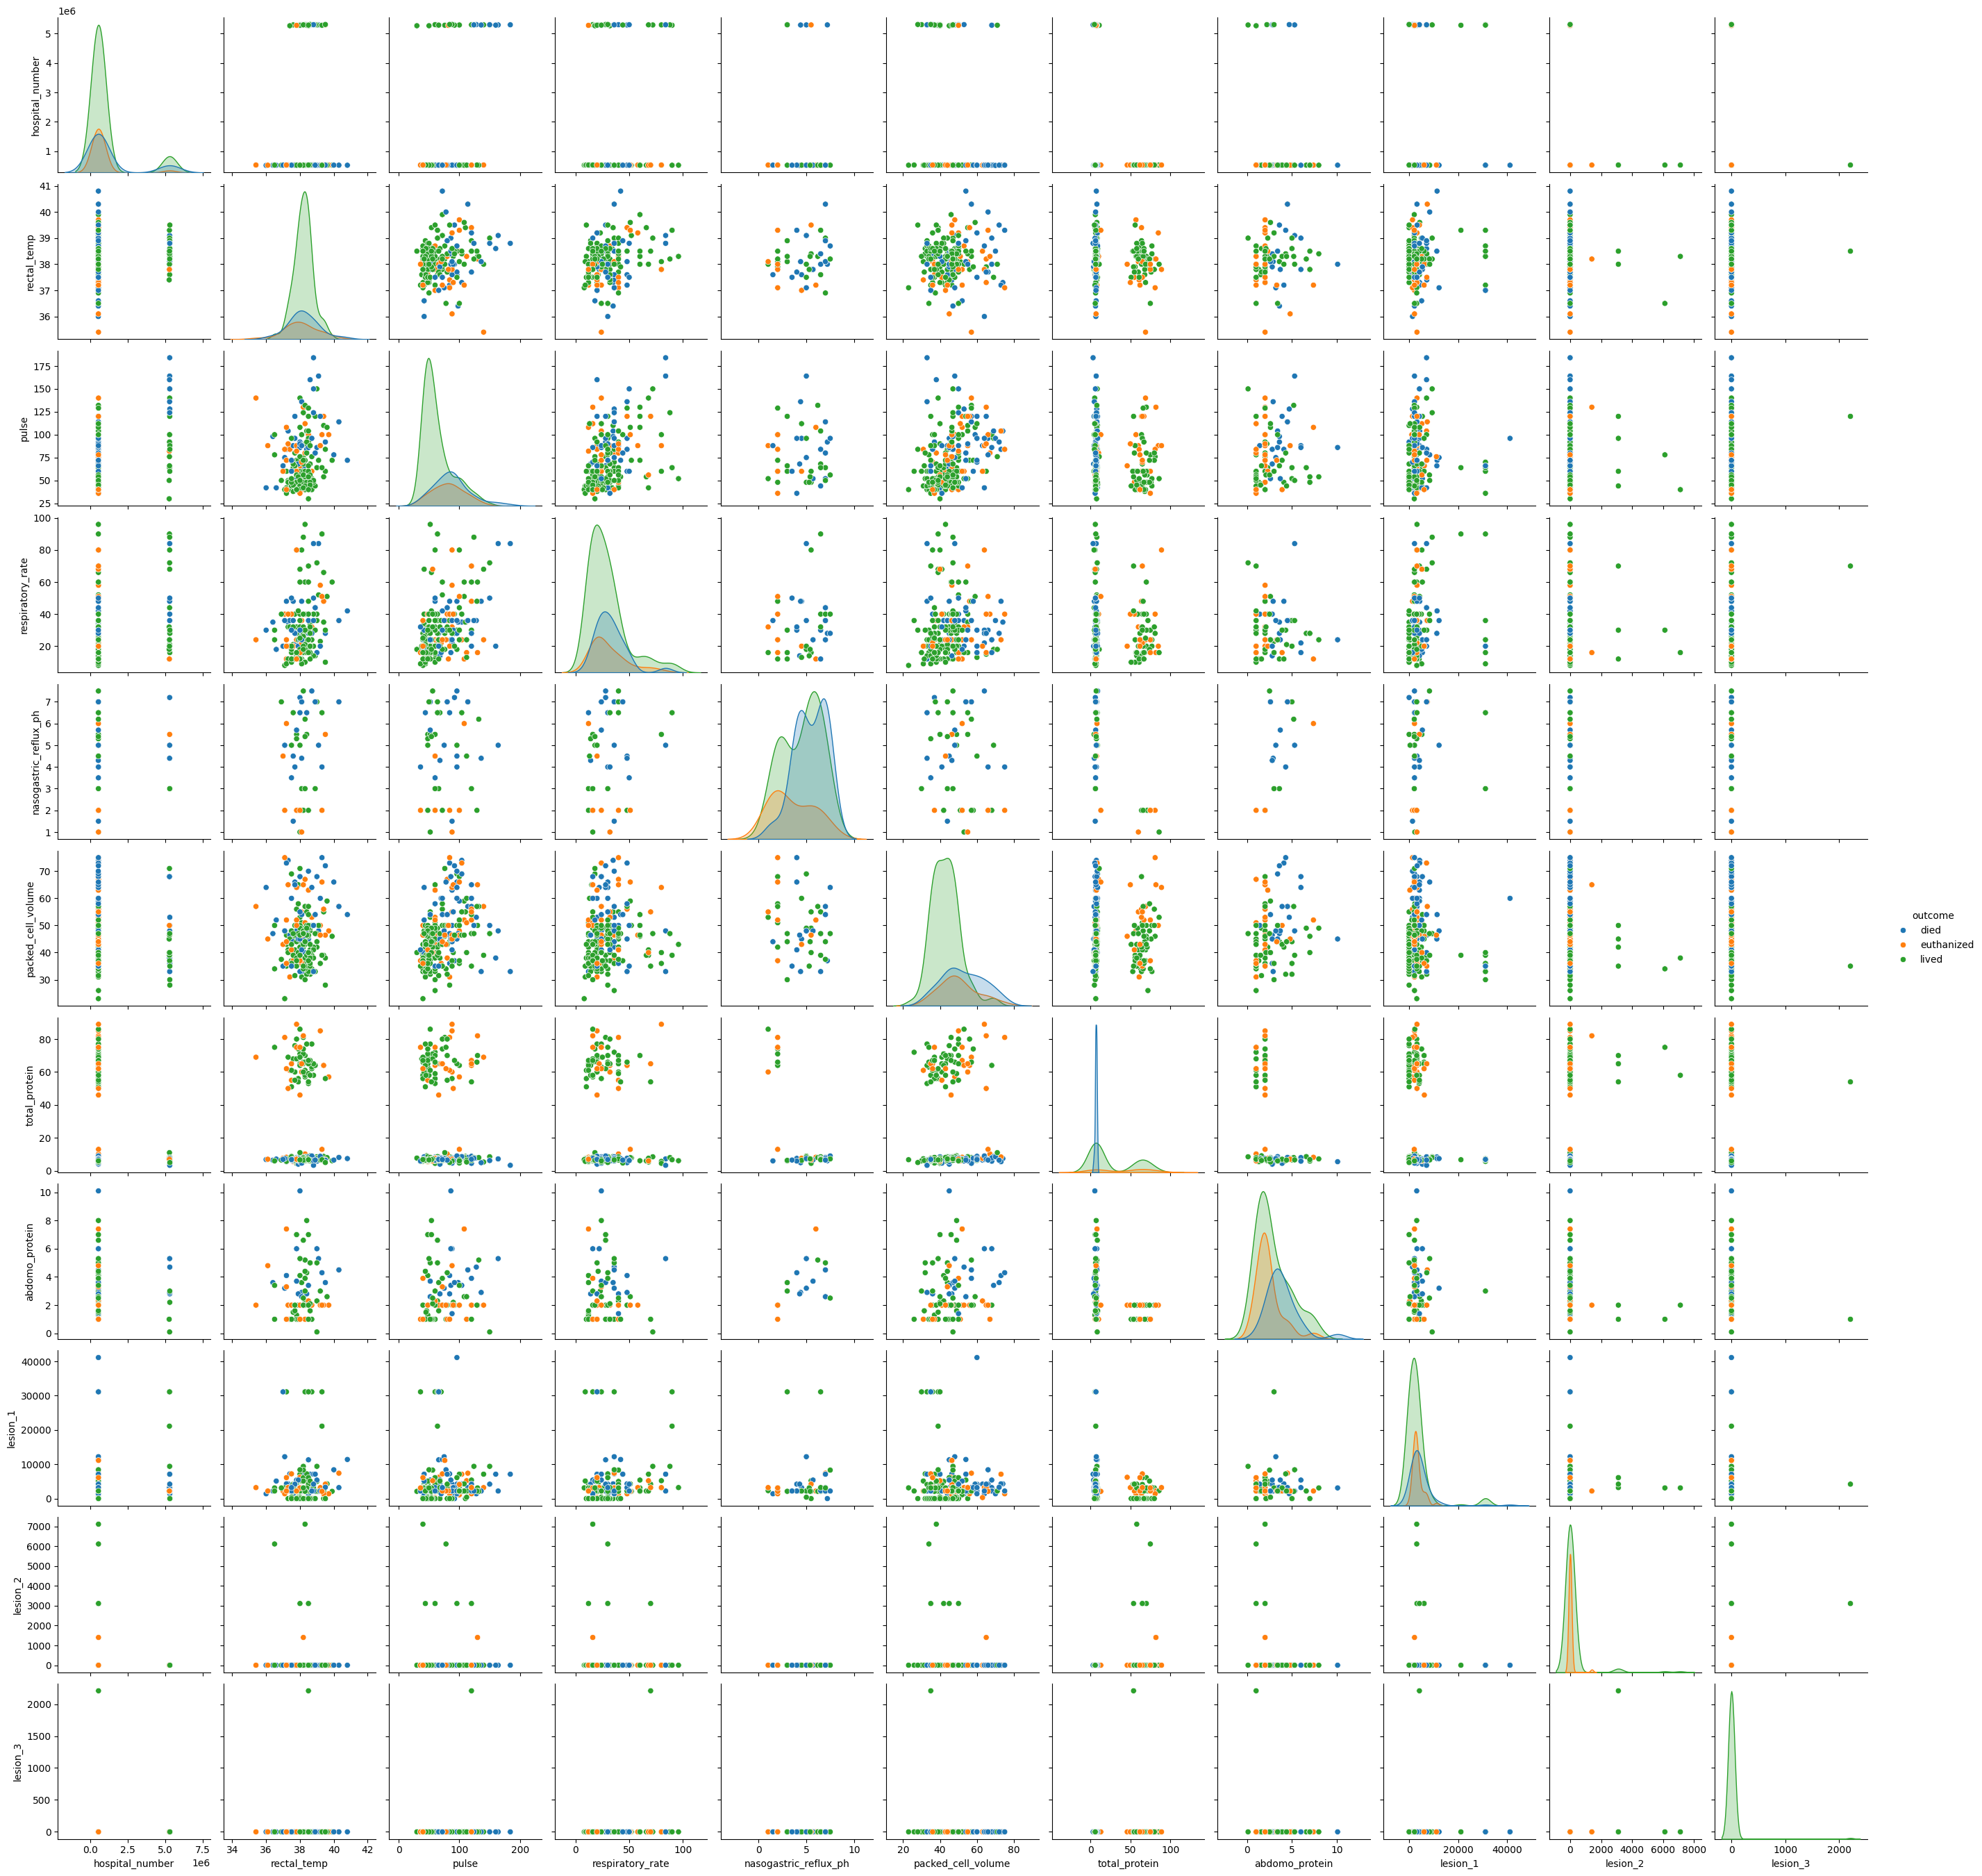

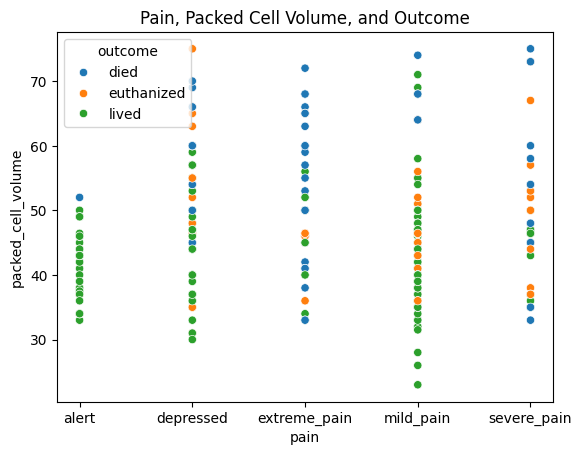

In [18]:
import numpy as np

# Pairwise correlation between numerical variables
numerical_cols = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_cols.corr()
print(correlation_matrix)

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Pair plot for numerical columns
sns.pairplot(data, vars=numerical_cols.columns, hue='outcome')
plt.show()

# Multivariate visualization (Outcome, Pain, Packed Cell Volume)
sns.scatterplot(x='pain', y='packed_cell_volume', hue='outcome', data=data)
plt.title("Pain, Packed Cell Volume, and Outcome")
plt.show()

In [19]:
#MODULE 2

In [20]:
#Data Deduplication

In [21]:
num_duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Removing duplicate rows
data = data.drop_duplicates()
print(f"Dataset shape after deduplication: {data.shape}")

Number of duplicate rows: 0
Dataset shape after deduplication: (285, 28)


In [22]:
#Replacing Values

In [23]:
import numpy as np

# Replace "NA" strings with actual NaN values
data.replace("NA", np.nan, inplace=True)

# Verify replacements
print(data.isnull().sum())

surgery                    0
age                        0
hospital_number            0
rectal_temp               52
pulse                     16
respiratory_rate          49
temp_of_extremities       42
peripheral_pulse          55
mucous_membrane           33
capillary_refill_time     19
pain                       0
peristalsis               30
abdominal_distention      42
nasogastric_tube          90
nasogastric_reflux        92
nasogastric_reflux_ph    232
rectal_exam_feces         88
abdomen                  104
packed_cell_volume         0
total_protein             23
abdomo_appearance        152
abdomo_protein           185
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


In [24]:
#Discretization and Binning

In [25]:
# Discretize 'packed_cell_volume' into bins
bins = [0, 30, 50, 100]  # Define bin ranges
labels = ['Low', 'Medium', 'High']  # Define labels for bins
data['packed_cell_volume_bin'] = pd.cut(data['packed_cell_volume'], bins=bins, labels=labels)

# View the distribution of binned data
print(data['packed_cell_volume_bin'].value_counts())

packed_cell_volume_bin
Medium    209
High       72
Low         4
Name: count, dtype: int64


In [26]:
#  Introduction to Missing Data

In [27]:
# Count missing values in each column
missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)

# Percentage of missing values
missing_percentage = (missing_data / len(data)) * 100
print("Missing Data Percentage:\n", missing_percentage)

Missing Data:
 surgery                     0
age                         0
hospital_number             0
rectal_temp                52
pulse                      16
respiratory_rate           49
temp_of_extremities        42
peripheral_pulse           55
mucous_membrane            33
capillary_refill_time      19
pain                        0
peristalsis                30
abdominal_distention       42
nasogastric_tube           90
nasogastric_reflux         92
nasogastric_reflux_ph     232
rectal_exam_feces          88
abdomen                   104
packed_cell_volume          0
total_protein              23
abdomo_appearance         152
abdomo_protein            185
outcome                     0
surgical_lesion             0
lesion_1                    0
lesion_2                    0
lesion_3                    0
cp_data                     0
packed_cell_volume_bin      0
dtype: int64
Missing Data Percentage:
 surgery                    0.000000
age                        0.000000
hosp

In [28]:
#Handling Missing Data: Traditional Methods

In [29]:
# Remove rows with more than 50% missing values
threshold = len(data.columns) * 0.5
data = data.dropna(thresh=threshold, axis=0)  # Dropping rows

# Remove columns with more than 50% missing values
data = data.dropna(thresh=len(data) * 0.5, axis=1)  # Dropping columns

print(f"Dataset shape after removing rows/columns with too many missing values: {data.shape}")

Dataset shape after removing rows/columns with too many missing values: (285, 26)


In [30]:
#Imputing Missing Values (Traditional Methods: Mean, Median, Mode)

In [31]:
# Impute numerical columns with mean
data['packed_cell_volume'] = data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean())

# Impute categorical columns with mode
for col in data.select_dtypes(include=['category', 'object']):
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verify missing data after imputation
print(data.isnull().sum())

surgery                    0
age                        0
hospital_number            0
rectal_temp               52
pulse                     16
respiratory_rate          49
temp_of_extremities        0
peripheral_pulse           0
mucous_membrane            0
capillary_refill_time      0
pain                       0
peristalsis                0
abdominal_distention       0
nasogastric_tube           0
nasogastric_reflux         0
rectal_exam_feces          0
abdomen                    0
packed_cell_volume         0
total_protein             23
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
packed_cell_volume_bin     0
dtype: int64


<ipython-input-31-9a566da7c5d2>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [32]:
#MODULE 3

In [33]:
#Adding a Time-Based Index

In [34]:
# Simulate a time column (daily observations)
data['date'] = pd.date_range(start='2024-01-01', periods=len(data), freq='D')

# Set 'date' as the index
data.set_index('date', inplace=True)
print(data.head())

           surgery    age  hospital_number  rectal_temp  pulse  \
date                                                             
2024-01-01      no  adult           530101         38.5   66.0   
2024-01-02     yes  adult           534817         39.2   88.0   
2024-01-03      no  adult           530334         38.3   40.0   
2024-01-04     yes  young          5290409         39.1  164.0   
2024-01-05      no  adult           530255         37.3  104.0   

            respiratory_rate temp_of_extremities peripheral_pulse  \
date                                                                
2024-01-01              28.0                cool          reduced   
2024-01-02              20.0                cool           normal   
2024-01-03              24.0              normal           normal   
2024-01-04              84.0                cold           normal   
2024-01-05              35.0                cool           normal   

           mucous_membrane capillary_refill_time  ...

In [35]:
#Visualizing Time Series

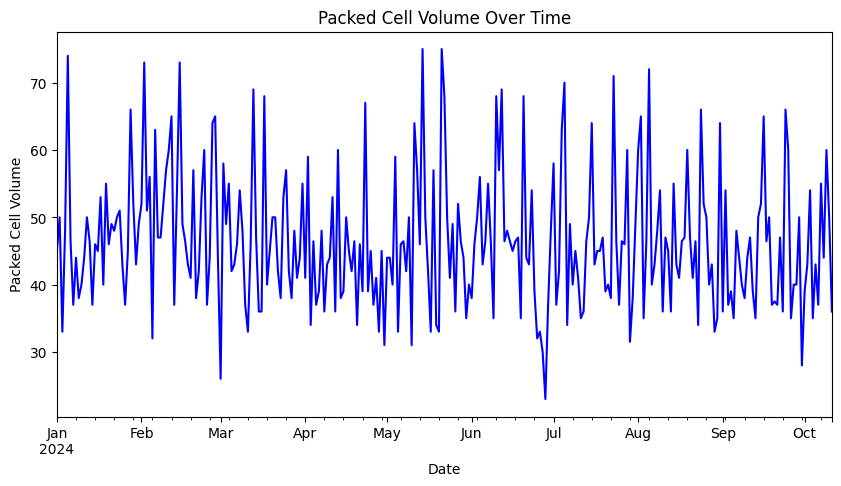

In [36]:
# Line plot for 'packed_cell_volume' over time
data['packed_cell_volume'].plot(kind='line', figsize=(10, 5), color='blue')
plt.title("Packed Cell Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Packed Cell Volume")
plt.show()

In [37]:
#Grouping Time-Series Data

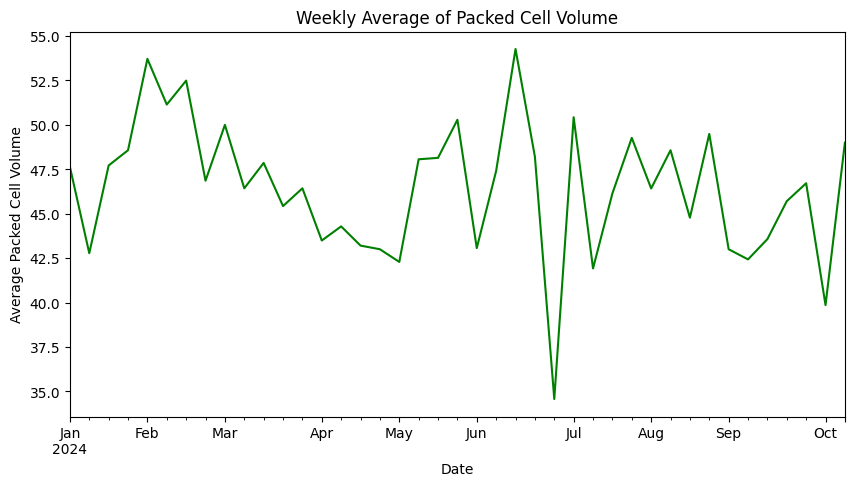

In [38]:
# Weekly average of packed_cell_volume
weekly_avg = data['packed_cell_volume'].resample('W').mean()
weekly_avg.plot(kind='line', figsize=(10, 5), color='green')
plt.title("Weekly Average of Packed Cell Volume")
plt.xlabel("Date")
plt.ylabel("Average Packed Cell Volume")
plt.show()

In [39]:
#Resampling Time Series Data

<ipython-input-40-3696146986e2>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = data['total_protein'].resample('M').sum()


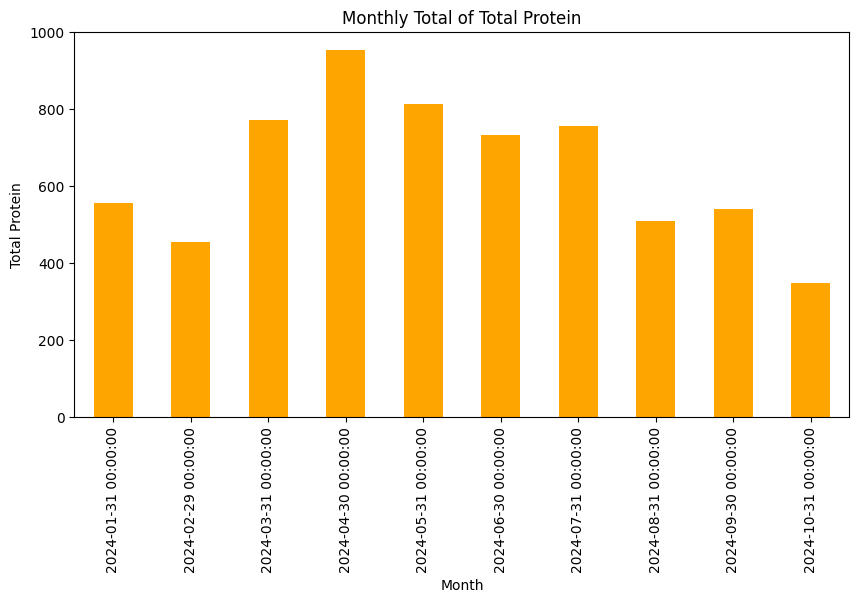

In [40]:
# Monthly sum of total_protein
monthly_sum = data['total_protein'].resample('M').sum()
monthly_sum.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title("Monthly Total of Total Protein")
plt.xlabel("Month")
plt.ylabel("Total Protein")
plt.show()


In [41]:
#Time Series Characteristics

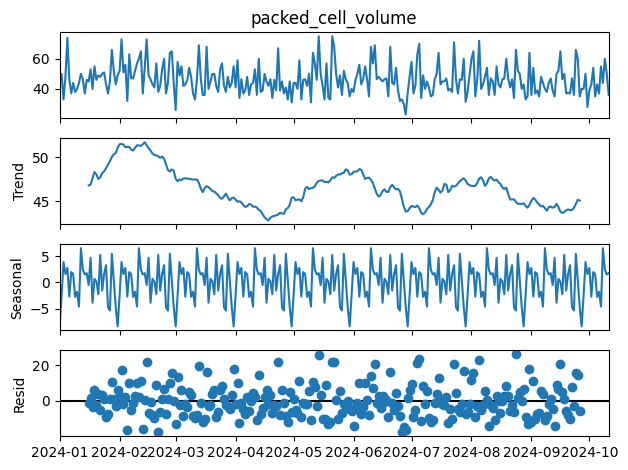

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition (example with packed_cell_volume)
result = seasonal_decompose(data['packed_cell_volume'], model='additive', period=30)

# Plot decomposition components
result.plot()
plt.show()

In [44]:
#MODULE 4

In [45]:
#1-D Statistical Data Analysis

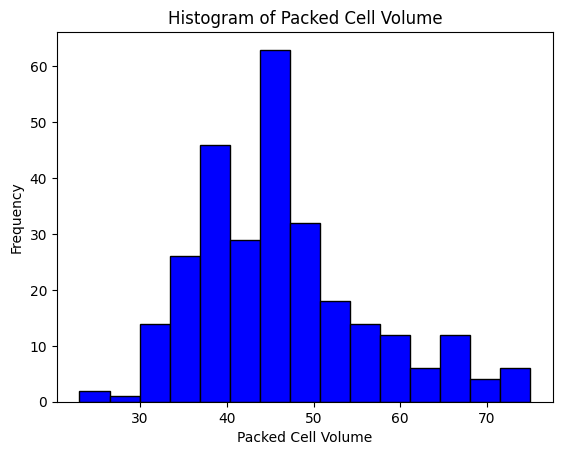

In [46]:
# Histogram for 'packed_cell_volume'
data['packed_cell_volume'].plot(kind='hist', bins=15, color='blue', edgecolor='black')
plt.title("Histogram of Packed Cell Volume")
plt.xlabel("Packed Cell Volume")
plt.ylabel("Frequency")
plt.show()

In [47]:
#2-D Statistical Data Analysis

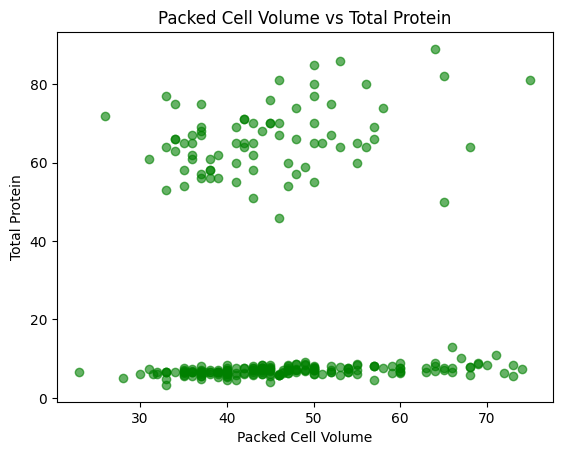

In [48]:
# Scatter plot: Packed Cell Volume vs Total Protein
plt.scatter(data['packed_cell_volume'], data['total_protein'], color='green', alpha=0.6)
plt.title("Packed Cell Volume vs Total Protein")
plt.xlabel("Packed Cell Volume")
plt.ylabel("Total Protein")
plt.show()

In [49]:
# n-D Statistical Data Analysis

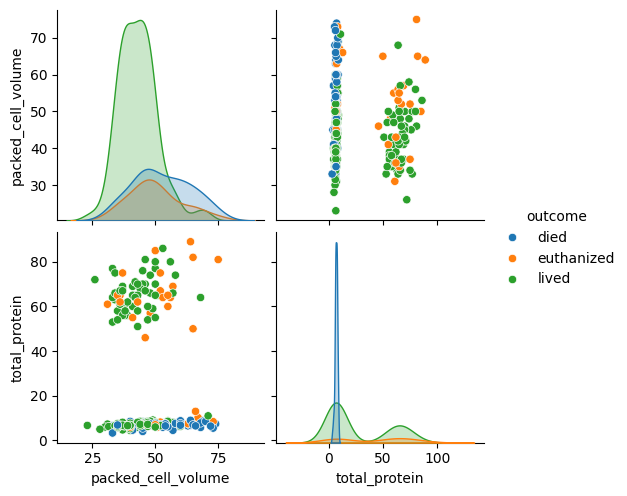

In [50]:
# Pairplot for multiple numerical columns
sns.pairplot(data, vars=['packed_cell_volume', 'total_protein'], hue='outcome', diag_kind='kde')
plt.show()

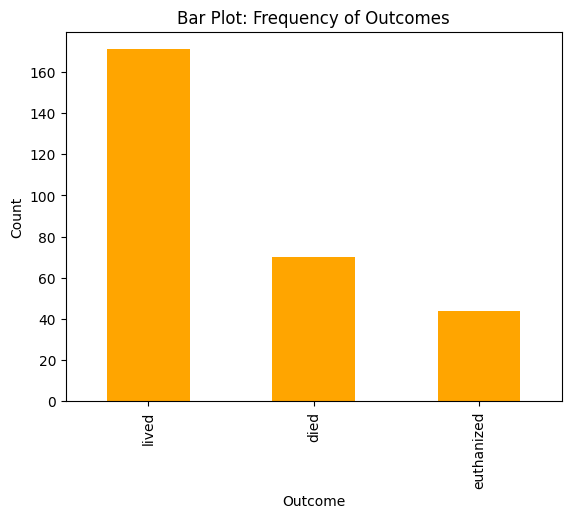

In [51]:
#Barplot

# Bar plot for the frequency of 'outcome'
data['outcome'].value_counts().plot(kind='bar', color='orange')
plt.title("Bar Plot: Frequency of Outcomes")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()


In [52]:
#MODULE 5

In [53]:
#Data Preparation for Clustering

In [54]:
# Select numerical columns for clustering
numerical_data = data[['packed_cell_volume', 'total_protein']].dropna()

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [55]:
#Spectral Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


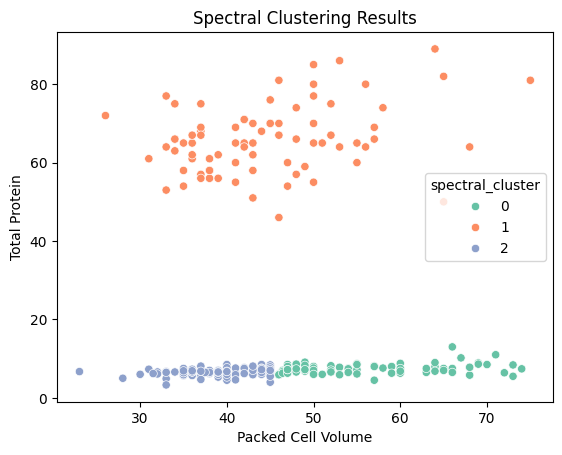

In [56]:
from sklearn.cluster import SpectralClustering

# Perform Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
numerical_data['spectral_cluster'] = spectral.fit_predict(scaled_data)

# Visualize results
sns.scatterplot(x=numerical_data['packed_cell_volume'],
                y=numerical_data['total_protein'],
                hue=numerical_data['spectral_cluster'],
                palette='Set2')
plt.title("Spectral Clustering Results")
plt.xlabel("Packed Cell Volume")
plt.ylabel("Total Protein")
plt.show()

In [59]:
#Minimum Spanning Tree Clustering

In [60]:
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import minimum_spanning_tree

# Create a nearest neighbors graph
graph = kneighbors_graph(scaled_data, n_neighbors=5, include_self=False)

# Compute the Minimum Spanning Tree
mst = minimum_spanning_tree(graph)
print(mst.toarray())  # Outputs MST adjacency matrix

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [61]:
#Model-Based Clustering (Expectation-Maximization)

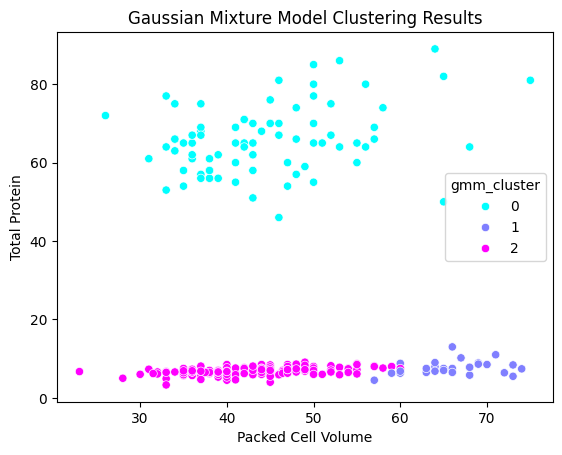

In [62]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
numerical_data['gmm_cluster'] = gmm.fit_predict(scaled_data)

# Visualize results
sns.scatterplot(x=numerical_data['packed_cell_volume'],
                y=numerical_data['total_protein'],
                hue=numerical_data['gmm_cluster'],
                palette='cool')
plt.title("Gaussian Mixture Model Clustering Results")
plt.xlabel("Packed Cell Volume")
plt.ylabel("Total Protein")
plt.show()

In [63]:
#Hierarchical Agglomerative Clustering

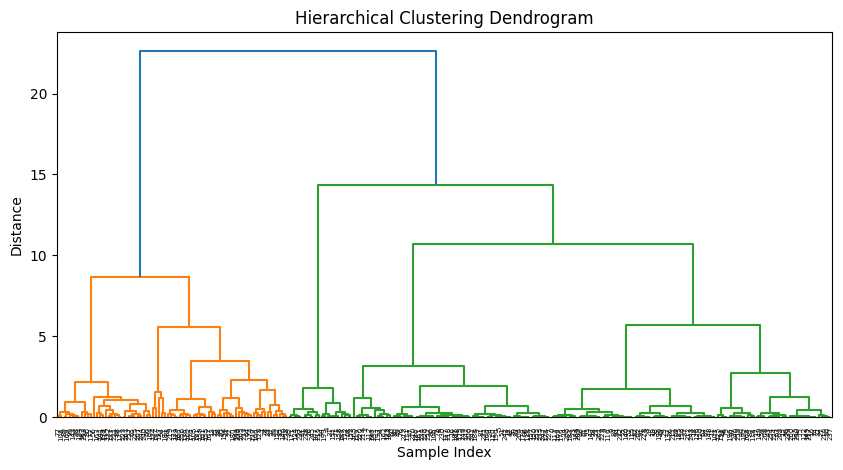

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [65]:
#MODULE 6

In [66]:
#Data Preparation for Dimensionality Reduction

In [67]:
# Select numerical columns for dimensionality reduction
numerical_data = data[['packed_cell_volume', 'total_protein']].dropna()

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

In [68]:
#Principal Component Analysis (PCA)

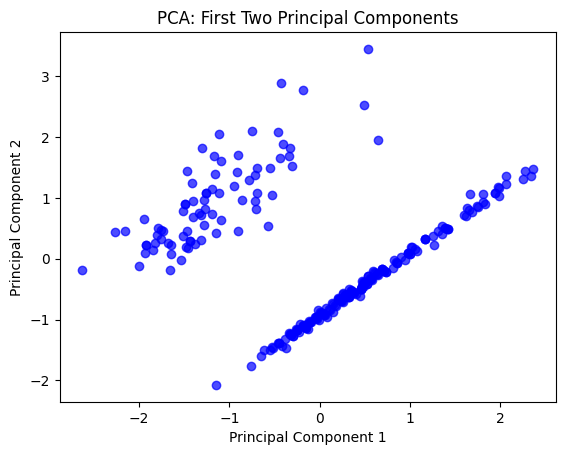

Explained variance ratio: [0.53113008 0.46886992]


In [69]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot the first two principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', alpha=0.7)
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

In [70]:
#Singular Value Decomposition (SVD)

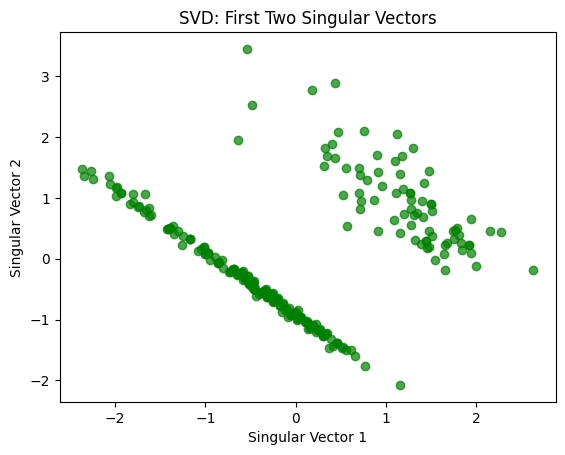

In [71]:
from sklearn.decomposition import TruncatedSVD

# Apply SVD (equivalent to PCA for 2 components)
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(scaled_data)

# Plot the SVD result
plt.scatter(svd_result[:, 0], svd_result[:, 1], c='green', alpha=0.7)
plt.title("SVD: First Two Singular Vectors")
plt.xlabel("Singular Vector 1")
plt.ylabel("Singular Vector 2")
plt.show()

In [72]:
#Intrinsic Dimensionality

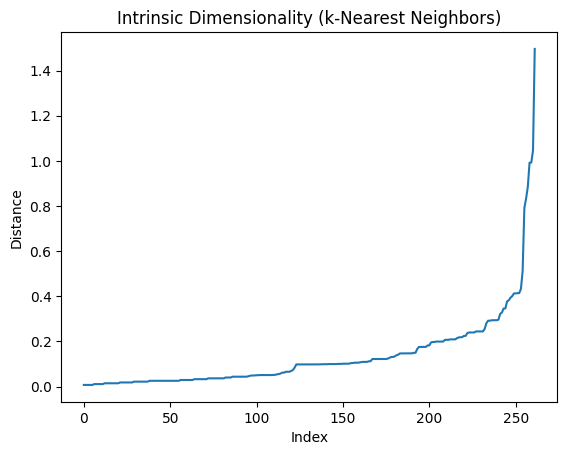

In [73]:
# Use the 'kneighbors' method from NearestNeighbors to estimate intrinsic dimensionality
from sklearn.neighbors import NearestNeighbors

# Fit Nearest Neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors.fit(scaled_data)

# Fit the model and find distances
distances, _ = neighbors.kneighbors(scaled_data)

# Plot the distances to check dimensionality
plt.plot(sorted(distances[:, -1]))
plt.title("Intrinsic Dimensionality (k-Nearest Neighbors)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

In [74]:
#Multidimensional Scaling (MDS)

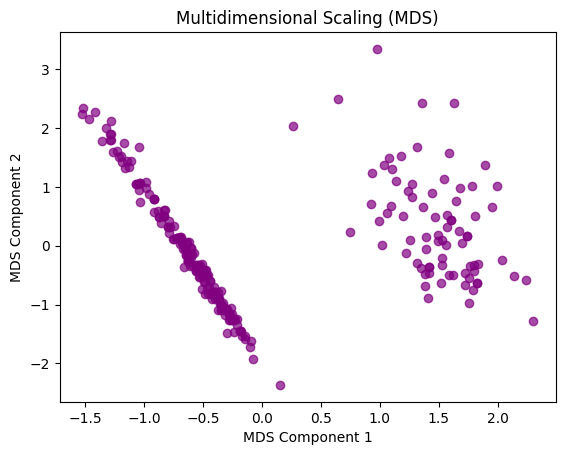

In [75]:
from sklearn.manifold import MDS

# Apply MDS
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(scaled_data)

# Plot MDS result
plt.scatter(mds_result[:, 0], mds_result[:, 1], c='purple', alpha=0.7)
plt.title("Multidimensional Scaling (MDS)")
plt.xlabel("MDS Component 1")
plt.ylabel("MDS Component 2")
plt.show()

In [76]:
#Manifold Learning (Isomap)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 11 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-package

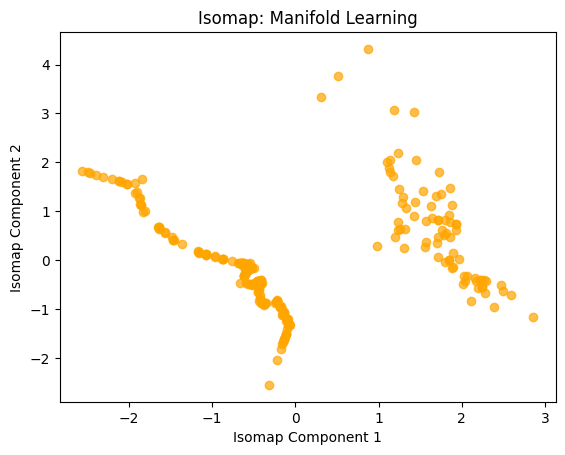

In [77]:
from sklearn.manifold import Isomap

# Apply Isomap
isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(scaled_data)

# Plot Isomap result
plt.scatter(isomap_result[:, 0], isomap_result[:, 1], c='orange', alpha=0.7)
plt.title("Isomap: Manifold Learning")
plt.xlabel("Isomap Component 1")
plt.ylabel("Isomap Component 2")
plt.show()

In [78]:
#MODULE 7

In [79]:
#CRemove null values

In [81]:
# Remove rows where the target variable has NaN values
data_clean = data.dropna(subset=['total_protein'])

# Re-split the data
X = data_clean[['packed_cell_volume']]
y = data_clean['total_protein']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [82]:
#Impute

In [83]:
from sklearn.impute import SimpleImputer

# Impute missing values in the target variable using the mean
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(data[['total_protein']])

# Re-split the data with the imputed target variable
X = data[['packed_cell_volume']]
y = y_imputed

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [88]:
data = data.dropna(subset=['packed_cell_volume'])
